## Knapsack 0/1

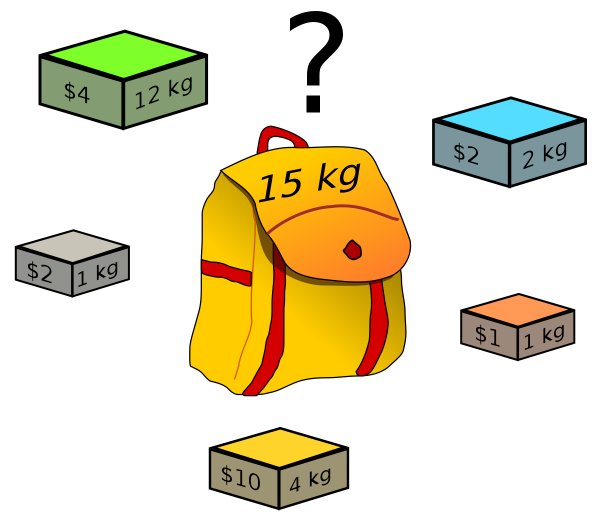

In [ ]:
# phát biểu: có n = 12 vật có giá trị và cân nặng có trước
# hãy để n vật này vào một cái túi có sức chứa tối đa max_weight = 70kg
# sao cho giá trị trong chiếc túi là lớn nhất.

import random

n = 12   # so luong vat
m = 1000  # so luong ca the trong quan the
n_generations = 1000 # so doi
fitnesses = []  # de ve do thi fitnesses
max_weight = 70 # khối lượng tối đa cái túi có thể đựng được

# cho truoc du lieu
weights = [1, 2, 5, 7, 10, 12, 15, 23, 32, 33, 35, 37]  # can nang cac vat
prices =  [1, 3, 6, 7, 12, 15, 25, 32, 44, 45, 47, 50]  # gia tri cua cac vat tuong ung

# tao gia tri gen ngau nhien
def generate_random_value():  
    return random.randint(0, 1)   

# tinh fitness
def compute_fitness(individual):
    fitness = sum(c*x for c, x in zip(individual, prices))

    # kiem tra xem individual co vuot qua khoi luong khong
    if compute_weight(individual) > max_weight:
        # penalty
        fitness /= 1000
    
    return fitness

# tinh can nang
def compute_weight(individual):
    sum_weight = sum(c*x for c, x in zip(individual, weights))
    return sum_weight

# tao nhiem sac the
def create_individual():
    return [generate_random_value() for _ in range(n)]

# lua chon
def selection(sorted_population):
    index1 = random.randint(0, m-1)
    while True:
        index2 = random.randint(0, m-1)
        if index2 != index1:
            break
    individual = sorted_population[index1]
    if index1 < index2:
        individual = sorted_population[index2]
    return individual

# lai ghep
def crossover(individual1, individual2, crossover_rate = 0.9):
    individual_c1 = individual1.copy()
    individual_c2 = individual2.copy()
    if random.random() < crossover_rate:
        index = random.randint(1, n - 2)
        for i in range(index):
            individual_c1[i] = individual2[i]
            individual_c2[i] = individual1[i]
    return individual_c1, individual_c2

# dot bien
def mutate(individual, mutation_rate = 0.05):
    individual_new = individual.copy()
    if random.random() < mutation_rate:
        index = random.randint(0, n-1)
        individual_new[index] = generate_random_value()
    return individual_new

# tao quan the moi
def create_new_population(old_popuation):
    sorted_old_popuation = sorted(old_popuation, key = compute_fitness)
    fitnesses.append(compute_fitness(sorted_old_popuation[-1]))
    #print('fitness', fitnesses[-1])

    new_population = []
    while len(new_population) < m - 2:
        # chon loc
        individual1 = selection(sorted_old_popuation)
        individual2 = selection(sorted_old_popuation)

        # lai ghep
        individual_c1, individual_c2 = crossover(individual1, individual2)

        # dot bien
        individual_m1 = mutate(individual_c1)
        individual_m2 = mutate(individual_c2)

        # cho vao quan the moi
        new_population.append(individual_m1)
        new_population.append(individual_m2)
        
    new_population.append(sorted_old_popuation[-1])
    new_population.append(sorted_old_popuation[-2])

    return new_population

# tao quan the ban dau
population = [create_individual() for _ in range(m)]

for _ in range(n_generations):
    population = create_new_population(population)

sorted_population = sorted(population, key = compute_fitness)
print('cach cho do vao: ', sorted_population[-1])
print('khoi luong: ', compute_weight(sorted_population[-1]))
print('gia tri: ', compute_fitness(sorted_population[-1]))